<a href="https://colab.research.google.com/github/daiju0722/Deeplearning2022Late/blob/main/CNN%2BTrain_example2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN(畳み込みを含むニューラルネットワーク)でモデルに学習させる (=訓練)

## 学習モデルのライブラリをimport

In [1]:
from keras.models import Sequential, Model # 学習モデルのクラス
from keras.layers import Conv2D # 畳み込み層のクラス
from keras.layers import Flatten # 全結合層のクラス
from keras.layers import Dense # （分類出力用の）普通のニューロン層

## keras自身もimport

In [2]:
import keras

### SVG画像表示用のライブラリをimport


In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

## その他のライブラリをimport

In [4]:
# 乱数を作るためにNumpyをimport
import numpy as np # importして、npという別名を設定
# 早期終了(Earl Stopping)のためのライブラリをimport
import keras.callbacks as callbacks # callbacksという別名を設定

### Numpyで乱数を作り、ダミーデータとして学習用、検証用にする

In [5]:
# 学習用データを x_train として作る
x_train = np.random.random((100, 6, 6, 1))
# 学習用データの正解を y_train として作る
y_train = keras.utils.to_categorical(np.random.randint(10,size=(100,1)), 
                                     num_classes=10)

In [6]:
# テスト検証用データを x_test として作る
# (6,6,1)の形を今度は20セット分
x_test = np.random.random((20,6,6,1))
# テスト検証用データの正解を y_test として作る
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20,1)),
                                    num_classes=10)

## 学習モデルを生成する

In [7]:
model = Sequential()

# 学習モデルにニューロンの層を追加してニューラルネットワークにする

### 畳み込み層を追加

In [8]:
model.add(Conv2D(filters=3, # フィルター３パターン
                 kernel_size=(3,3), # 受容野縦３横３
                 kernel_initializer='lecun_uniform',
                 input_shape=(6,6,1), # 入力データの形縦６、横６
                 name='Conv2D_1'
))

## そのほかの層も追加する

In [9]:
#全結合層

model.add(Flatten(name='Flatten_1'))

#softomaxで分類するニューロン層

model.add(Dense(units=10, activation='softmax', name='Dense_1'))

## 組み立てた学習モデルの構成を、SVG画像として表示


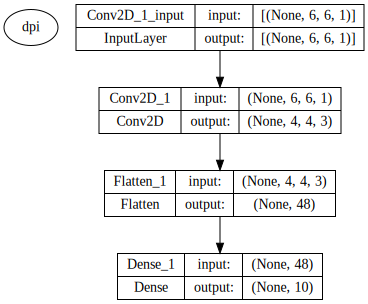

In [10]:
SVG(model_to_dot(model,
                show_shapes=True,
                dpi=None).create(prog='dot',format='svg'))

## 組み立てたモデルを学習データで訓練する
### 早期終了も設定する

In [11]:
# 早期終了用の設定のオブジェクトを用意する
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', #損失を監視

                                        patience=5 ) #epoch5つ分様子を見る

## 学習方法を指定して学習モデルをコンパイルする

In [16]:
model.compile(loss='mean_squared_error', # 損失を平均(mean)二乗(Squared)誤差
              optimizer='sgd' # パラメータの重みをSGDで最適化する
              # SGD = 確率勾配降下法
             )

### 学習方法を指定した学習モデルを訓練する

In [17]:
model.fit(
    x_train, y_train, # 学習データと答えデータ
    batch_size=32, # 32個ずつまとめて学習して重みを調整する
    epochs=10, # バッチが終わったら重みを調整して学習しなおす、その回数
    callbacks=[earlyStopping], # エポックの中で呼ぶcallback処理のリストに早期終了を追加
    validation_split=0.2 # 学習データのうち２割を、学習中の自己評価検証に使う
)

Epoch 1/10
3/3 [==============================] - 1s 95ms/step - loss: 0.0962 - val_loss: 0.0946
Epoch 2/10
3/3 [==============================] - 0s 24ms/step - loss: 0.0962 - val_loss: 0.0945
Epoch 3/10
3/3 [==============================] - 0s 14ms/step - loss: 0.0961 - val_loss: 0.0945
Epoch 4/10
3/3 [==============================] - 0s 15ms/step - loss: 0.0961 - val_loss: 0.0945
Epoch 5/10
3/3 [==============================] - 0s 15ms/step - loss: 0.0961 - val_loss: 0.0945
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0961 - val_loss: 0.0945
Epoch 7/10
3/3 [==============================] - 0s 14ms/step - loss: 0.0961 - val_loss: 0.0945
Epoch 8/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0961 - val_loss: 0.0945
Epoch 9/10
3/3 [==============================] - 0s 13ms/step - loss: 0.0961 - val_loss: 0.0944
Epoch 10/10
3/3 [==============================] - 0s 14ms/step - loss: 0.0961 - val_loss: 0.0944
